We will build a model to try to predict whether a certain image contains a picture of a cactus. We will begin with the necessary imports and displaying 10 of the pictures along with whether or not that picture contains a cactus. We will also prepare the data for processing.

/kaggle/input/aerial-cactus-identification/sample_submission.csv
/kaggle/input/aerial-cactus-identification/train.zip
/kaggle/input/aerial-cactus-identification/test.zip
/kaggle/input/aerial-cactus-identification/train.csv
has_cactus
1    13136
0     4364
Name: count, dtype: int64


,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


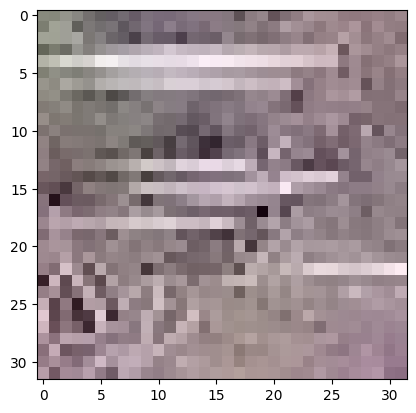

1


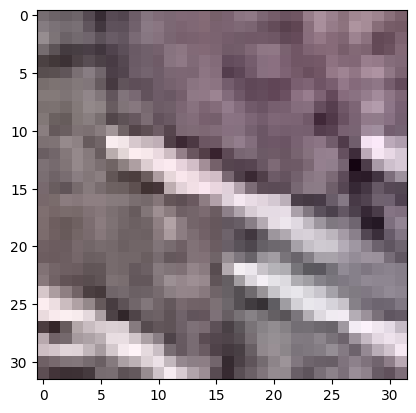

1


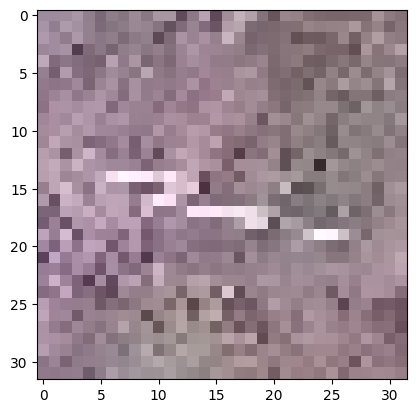

1


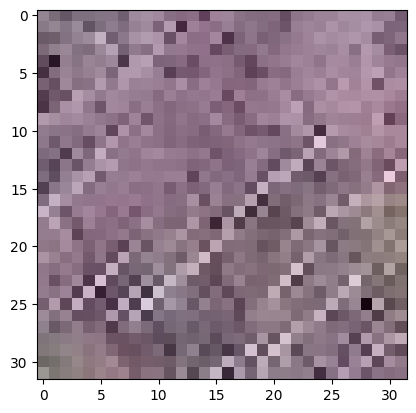

1


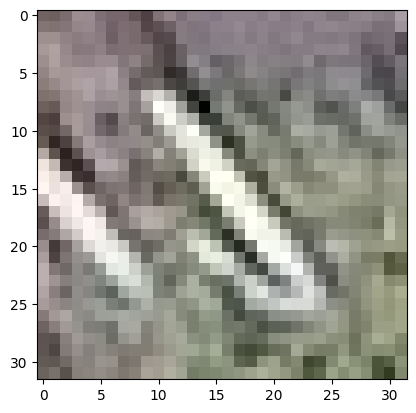

1


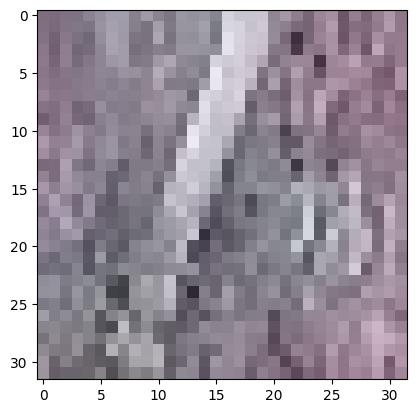

1


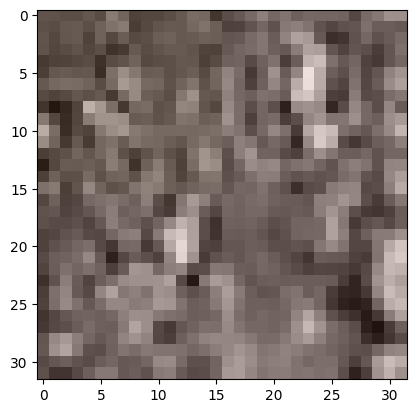

0


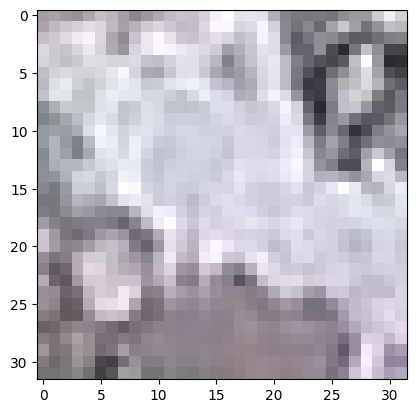

0


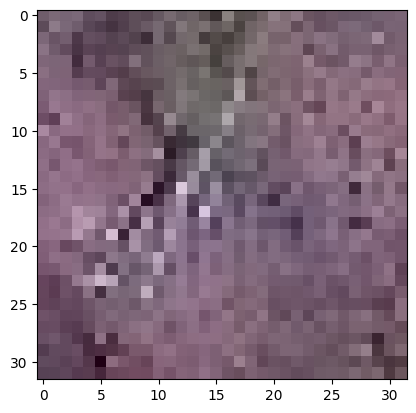

1


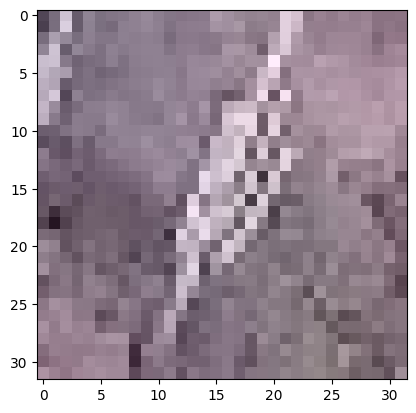

1
(32, 32, 3)
17500


,id,has_cactus,images
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1,"[[[136, 138, 125], [134, 136, 123], [148, 148,..."
1,000c8a36845c0208e833c79c1bffedd1.jpg,1,"[[[118, 109, 114], [108, 99, 104], [104, 95, 1..."
2,000d1e9a533f62e55c289303b072733d.jpg,1,"[[[158, 139, 158], [158, 139, 158], [159, 141,..."
3,0011485b40695e9138e92d0b3fb55128.jpg,1,"[[[147, 133, 146], [122, 108, 121], [101, 87, ..."
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1,"[[[113, 99, 98], [109, 95, 94], [123, 108, 111..."


In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from keras.callbacks import EarlyStopping
train_data = pd.read_csv('/kaggle/input/aerial-cactus-identification/train.csv')
print(train_data['has_cactus'].value_counts())
submission_df = pd.read_csv('/kaggle/input/aerial-cactus-identification/sample_submission.csv')

display(train_data.head())
zip_ref = zipfile.ZipFile('/kaggle/input/aerial-cactus-identification/train.zip')
zip_ref.extractall()
for i in range(10):
    
    img = mpimg.imread(f'train/{train_data.iloc[i].id}')
    plt.imshow(img)
    plt.show()
    print(train_data.iloc[i]['has_cactus'])
print(img.shape)
images = []
print(len(train_data))
for i in range(len(train_data)):
    img = mpimg.imread(f'train/{train_data.iloc[i].id}')
    images.append(img)
train_data['images'] = images
images = np.array(images)
display(train_data.head())

X_train,X_test,y_train, y_test = train_test_split(images,train_data['has_cactus'], stratify = train_data['has_cactus'], random_state = 28)
print(X_train.shape)

Our first model is a very simple model with only one hidden convolution layer with 20 nodes, and a dense output layer.

In [38]:
#model = Sequential()
#model.add(layers.Conv2D(20, input_shape = (32,32,3), activation = 'relu', kernel_size = 3))
#model.add(layers.Flatten())
#model.add(layers.Dense(1, activation = 'sigmoid'))
#model.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
#model.fit(X_train, y_train, epochs = 5)
#y_pred_test = model.predict(X_test)
#print(roc_auc_score(y_test,y_pred_test))

In [39]:
zip_ref = zipfile.ZipFile('/kaggle/input/aerial-cactus-identification/test.zip')
zip_ref.extractall()
#images = []
#for i in range(len(submission_df)):
    #img = mpimg.imread(f'test/{submission_df.iloc[i].id}')
    #images.append(img)
#images = np.array(images)
#print(images.shape)
#preds = model.predict(images)
#submission_df['has_cactus'] = preds
#submission_df.to_csv('submission.csv', index = False)
    

This model ended up scoring about a 0.95 ROC-AUC score. This is pretty impressive given the simplicity of the model. It should be possible to do much better with a more robust architecture. Our next model will have two hidden convolutional layers and use early stopping to incorporate more training epochs while reducing overfitting.

In [40]:
model = Sequential()
model.add(layers.Conv2D(20, input_shape = (32,32,3), activation = 'relu', kernel_size = 3, padding = 'same'))
model.add(layers.Conv2D(15, activation = 'relu', kernel_size = 3, padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
callback = EarlyStopping(patience = 2, verbose = 1, restore_best_weights = True)
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
model.fit(X_train, y_train, epochs = 20, validation_split = 0.2, callbacks = [callback])
y_pred_test = model.predict(X_test)
print(roc_auc_score(y_test,y_pred_test))

Epoch 1/20
329/329 [==============================] - 6s 16ms/step - loss: 1.5577 - val_loss: 0.2294
Epoch 2/20
329/329 [==============================] - 5s 16ms/step - loss: 0.1512 - val_loss: 0.1923
Epoch 3/20
329/329 [==============================] - 5s 16ms/step - loss: 0.0953 - val_loss: 0.1271
Epoch 4/20
329/329 [==============================] - 5s 15ms/step - loss: 0.0523 - val_loss: 0.1251
Epoch 5/20
329/329 [==============================] - 5s 16ms/step - loss: 0.0377 - val_loss: 0.2485
Epoch 6/20
329/329 [==============================] - 5s 16ms/step - loss: 0.0282 - val_loss: 0.1527
Epoch 6: early stopping
137/137 [==============================] - 1s 5ms/step
0.9943182008482646


In [41]:
images = []
for i in range(len(submission_df)):
    img = mpimg.imread(f'test/{submission_df.iloc[i].id}')
    images.append(img)
images = np.array(images)
print(images.shape)
preds = model.predict(images)
submission_df['has_cactus'] = preds
submission_df.to_csv('submission.csv', index = False)

(4000, 32, 32, 3)
125/125 [==============================] - 1s 5ms/step


This model scored a 0.98 ROC-AUC score. Moving forward, I'll try to improve this model by adding more layers and potentially adding more training data by rotating and flipping the given training data.